# Visualization of a simple artificial neural network

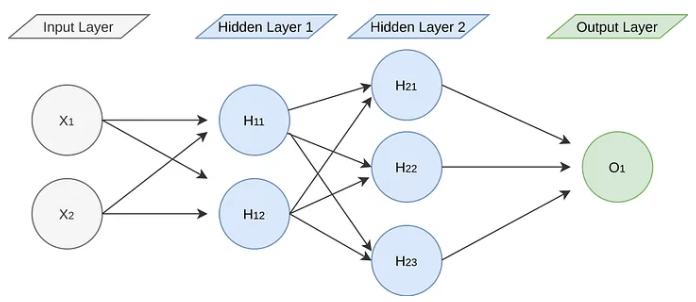

# An illustrative example to understand the theory behind neural networks

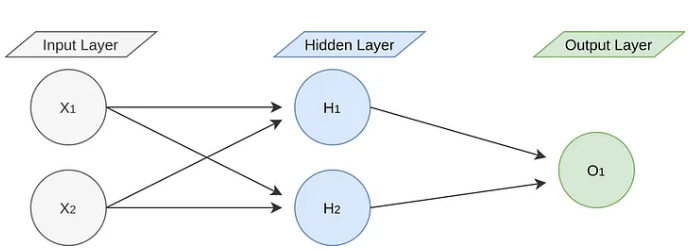

What is a neuron? :- Every entity inside the hidden layer/s.

Feed-Forward Movement

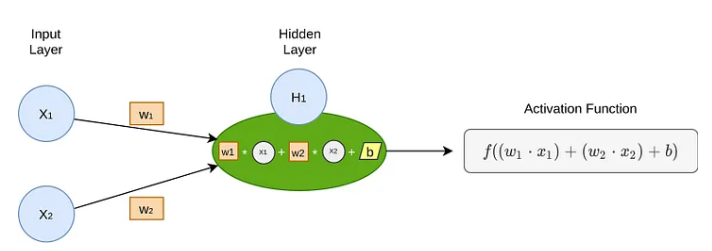

Activation Function

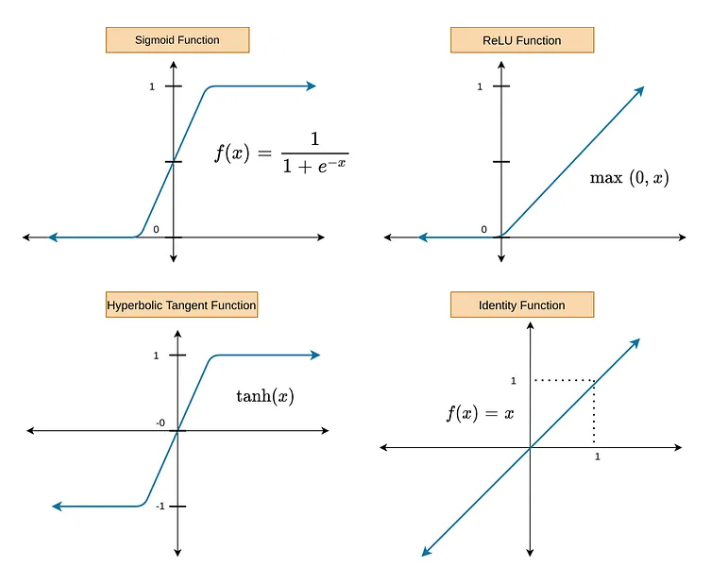

## A Numerical Example: Predicting the age of a tree given width and length.

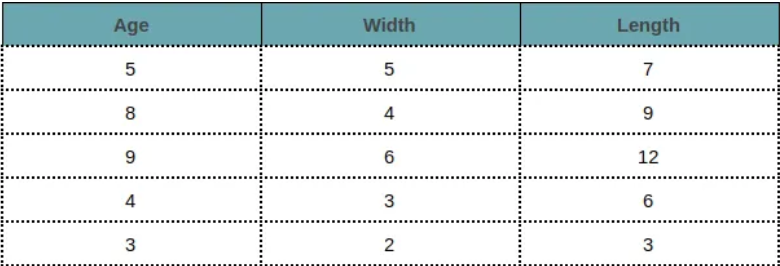

Feed forward action

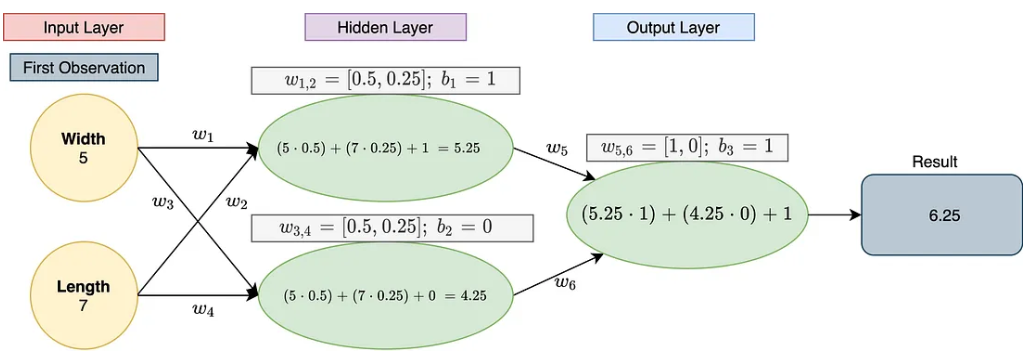

How to calculate the loss/ difference with the original value?

Regression- MSE, MAD etc

Classification- Crossentropy

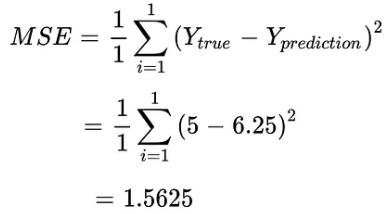

How to update weights and biases? : Take partial derivative of the loss (L) with respect to all the weights and biases. and then perform gradient descent. This is known as back propagation.

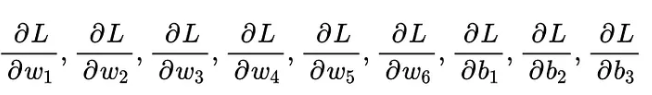

Let's calculate the derivatives.

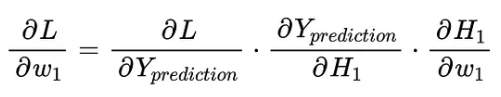


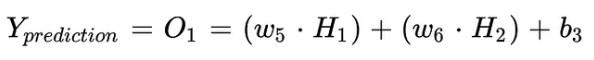

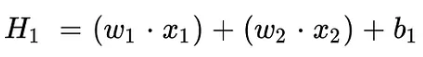

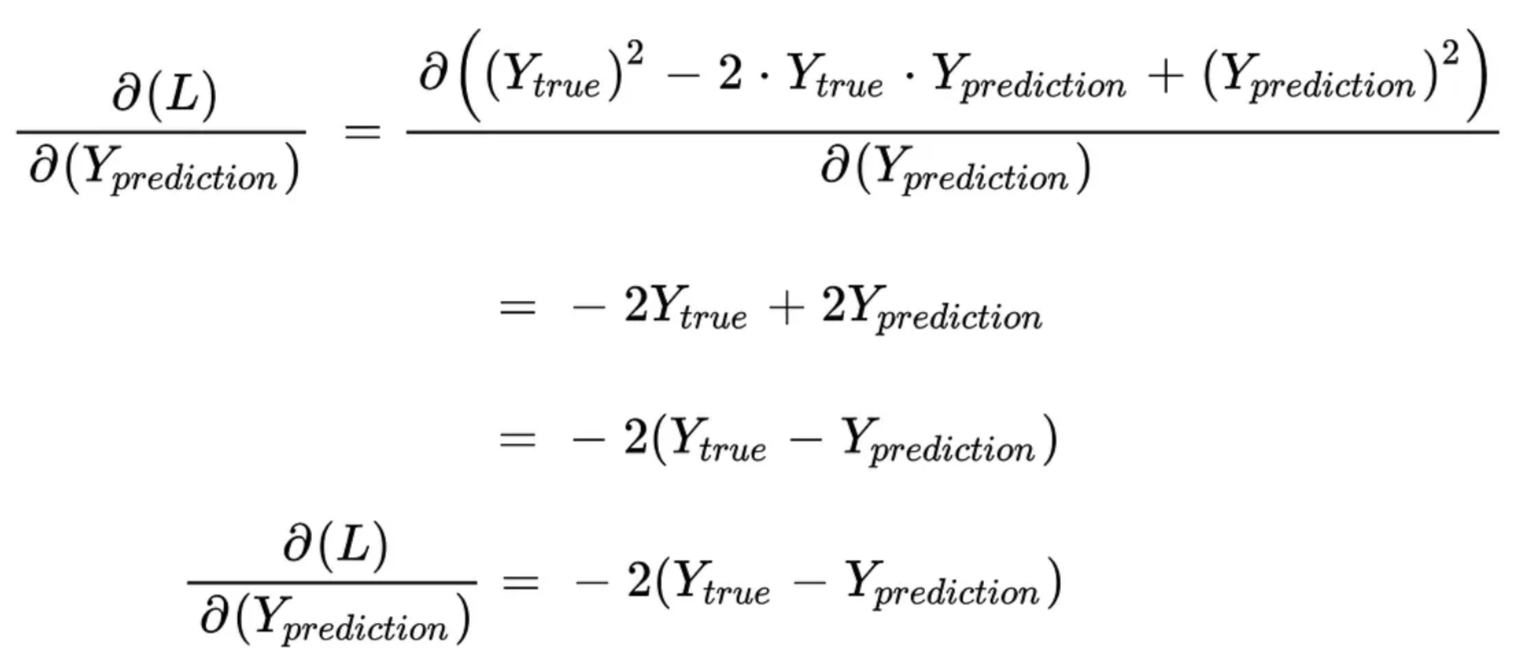

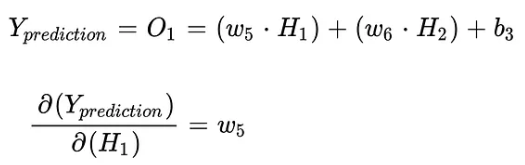

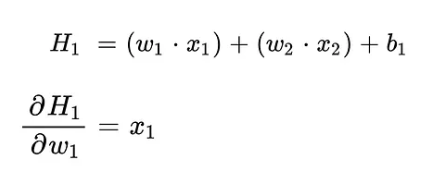

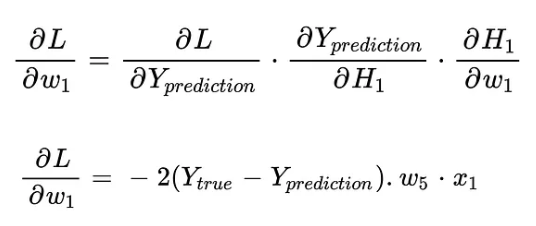

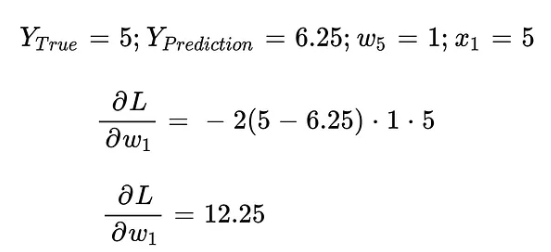

We know now, how the value of $w_1$ influences the loss. 

Next we want to change the value of $w_1$ with the aim of minimizing the loss function. We use stochastic gradient descent to achieve this.

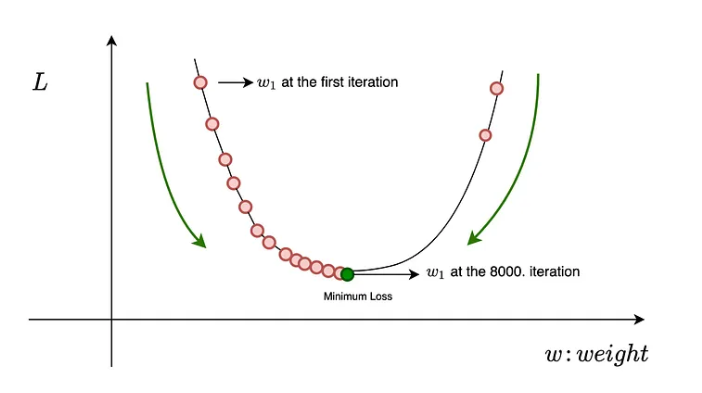

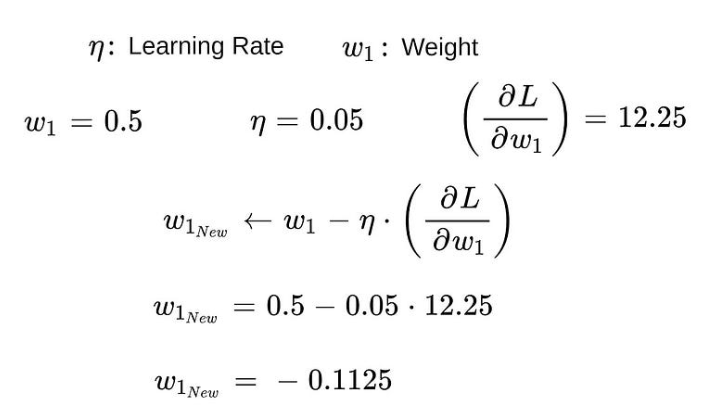

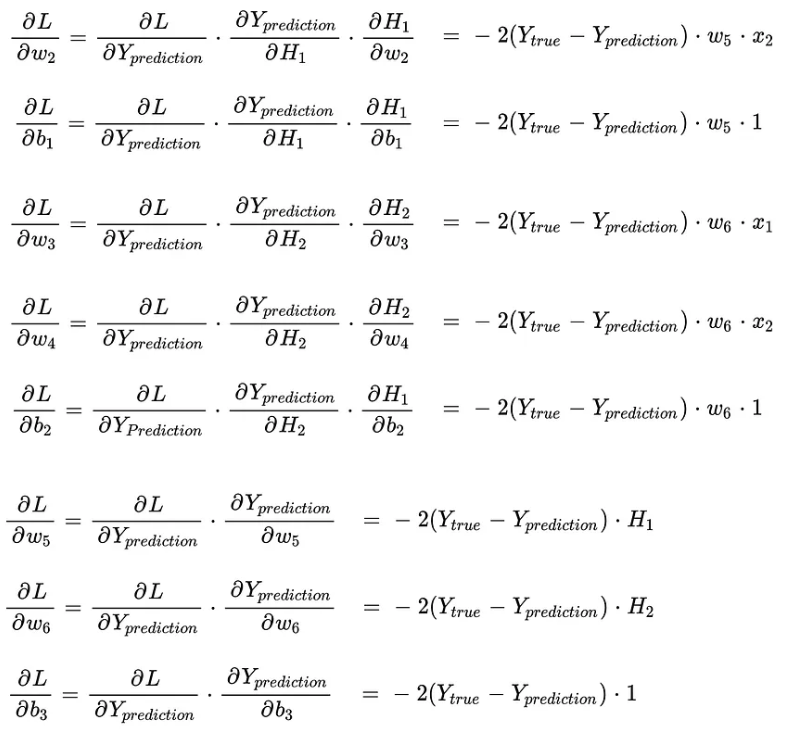

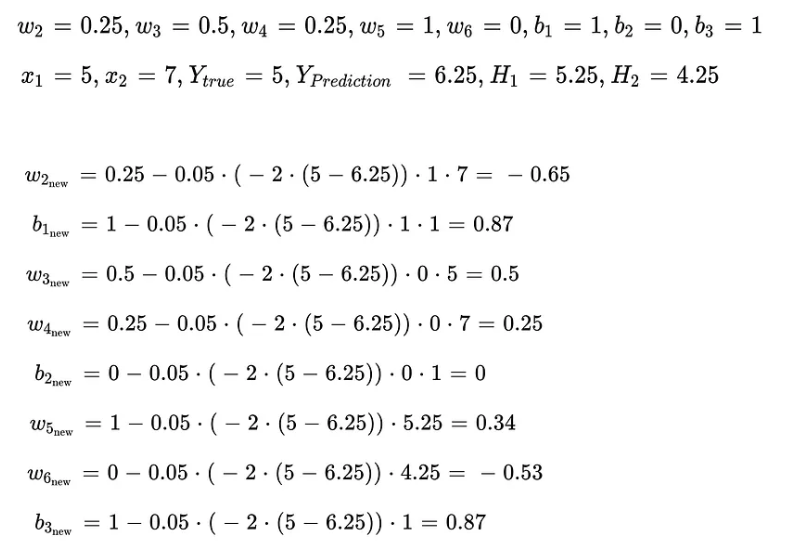

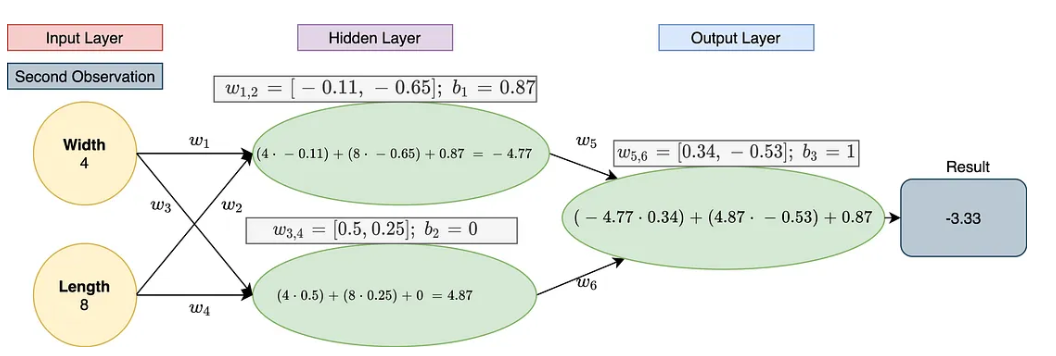

When to stop?: Until the maximum iterations are reached or a threshold of minimum decrease in loss is reached.

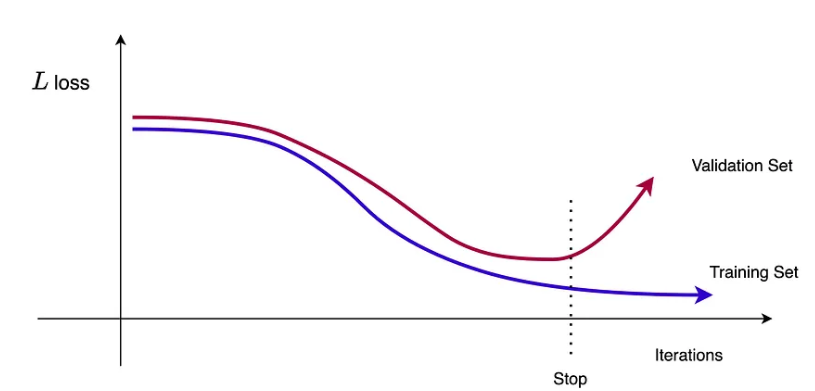

In [1]:
## importing libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the Digits dataset
digits = datasets.load_digits()

In [3]:
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [6]:
NN_model = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu', solver = 'adam', learning_rate = 'constant', learning_rate_init = 0.001)

In [7]:
NN_model.fit(X_train,y_train)

MLPClassifier()

In [8]:
y_NN = NN_model.predict(X_test)

In [9]:
print(classification_report(y_test, y_NN))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       0.97      0.97      0.97        90
           2       0.99      0.98      0.98        92
           3       0.98      0.98      0.98        93
           4       0.93      0.99      0.96        76
           5       0.95      0.95      0.95       108
           6       0.94      0.98      0.96        89
           7       0.99      0.95      0.97        78
           8       0.97      0.91      0.94        92
           9       0.98      0.97      0.97        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [ ]:
## MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

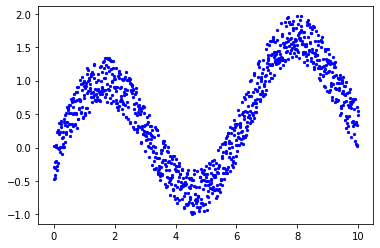

In [ ]:
## Making our own data
np.random.seed(21)

N = 1000    
def makeData(x):    
    r = [a/10 for a in x]
    y = np.sin(x)+np.random.uniform(-.5, .2, len(x))
    return np.array(y+r)

x = [i/100 for i in range(N)]
y = makeData(x)
x = np.array(x).reshape(-1,1)

plt.scatter(x, y, s=5, color="blue")
plt.show()

In [ ]:
NN_model = MLPRegressor(hidden_layer_sizes = (100,50,25,), activation = 'relu', solver = 'adam', learning_rate = 'constant', learning_rate_init = 0.001)

In [ ]:
NN_model.fit(x,y)

MLPRegressor(hidden_layer_sizes=(100, 50, 25))

In [ ]:
yfit = NN_model.predict(x)

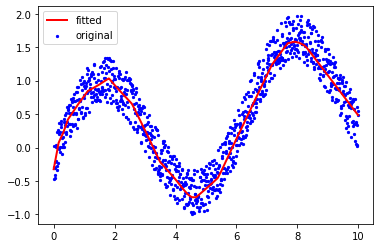

In [ ]:
plt.scatter(x, y, s=5, color="blue", label="original")
plt.plot(x, yfit, lw=2, color="red", label="fitted")
plt.legend()
plt.show()

## Types of Neural Network

1) Shallow Neural Networks

2) Deep Neural Networks

## Different Artificial Neural Networks
1) Multi-Layer perceptron

2) Convolutional Neural Network

3) Recurrent Neural Network

4) LSTM

5) Sequence to sequence models

etc.

In [10]:
## Using Pytorch to build a Sequential Model

In [36]:
import torch
import torch.nn as nn

In [37]:
## Creating a Sequential Model
model = nn.Sequential(
    nn.Linear(1,10),
    nn.ReLU(),
    nn.Linear(10,1)
)

In [38]:
model.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)>

In [39]:
a = model(torch.rand(1,1))

In [40]:
a

tensor([[-0.5074]], grad_fn=<AddmmBackward0>)

In [41]:
a.backward()

In [42]:
a

tensor([[-0.5074]], grad_fn=<AddmmBackward0>)

In [43]:
model[0].weight

Parameter containing:
tensor([[-0.0490],
        [-0.9390],
        [ 0.5345],
        [ 0.6121],
        [-0.0337],
        [ 0.8176],
        [ 0.7112],
        [-0.2370],
        [ 0.5790],
        [ 0.1120]], requires_grad=True)

In [44]:
## Calculating the gradient of weights with respect to "a"
model[0].weight.grad

tensor([[ 0.0475],
        [ 0.0000],
        [ 0.0000],
        [-0.1541],
        [ 0.0000],
        [-0.0273],
        [-0.0539],
        [-0.2513],
        [-0.2437],
        [ 0.0000]])

In [45]:
model[0].bias

Parameter containing:
tensor([ 0.2000, -0.8550, -0.5192,  0.2263, -0.7639, -0.1389,  0.6498,  0.6745,
         0.4937, -0.8935], requires_grad=True)

In [46]:
## Calculating the gradient of bias with respect to "a"
model[0].bias.grad

tensor([ 0.0571,  0.0000,  0.0000, -0.1851,  0.0000, -0.0328, -0.0647, -0.3018,
        -0.2927,  0.0000])

In [50]:
## Reset Gradients to zero by Zero grad
model.zero_grad()

In [53]:
model[0].bias.grad

None


In [52]:
model[0].weight.grad

In [57]:
## Training Loop
model = nn.Sequential(
    nn.Linear(1,10),
    nn.ReLU(),
    nn.Linear(10,1)
)

x = torch.rand(1000,1)
y = x**2

for i in range(100):
  out = model(x)
  loss = sum((out - y)**2/1000)
  print(loss)
  loss.backward()
  dx1 = model[0].weight.grad
  dx2 = model[2].weight.grad
  db1 = model[0].bias.grad
  db2 = model[2].bias.grad
  with torch.no_grad():
    model[0].weight -= 0.01 * dx1
    model[2].weight -= 0.01 * dx2
    model[0].bias -= 0.01* db1
    model[2].bias -= 0.01* db2
  model.zero_grad()

tensor([0.4988], grad_fn=<AddBackward0>)
tensor([0.4710], grad_fn=<AddBackward0>)
tensor([0.4453], grad_fn=<AddBackward0>)
tensor([0.4216], grad_fn=<AddBackward0>)
tensor([0.3997], grad_fn=<AddBackward0>)
tensor([0.3795], grad_fn=<AddBackward0>)
tensor([0.3608], grad_fn=<AddBackward0>)
tensor([0.3434], grad_fn=<AddBackward0>)
tensor([0.3273], grad_fn=<AddBackward0>)
tensor([0.3124], grad_fn=<AddBackward0>)
tensor([0.2987], grad_fn=<AddBackward0>)
tensor([0.2859], grad_fn=<AddBackward0>)
tensor([0.2742], grad_fn=<AddBackward0>)
tensor([0.2632], grad_fn=<AddBackward0>)
tensor([0.2531], grad_fn=<AddBackward0>)
tensor([0.2438], grad_fn=<AddBackward0>)
tensor([0.2351], grad_fn=<AddBackward0>)
tensor([0.2270], grad_fn=<AddBackward0>)
tensor([0.2196], grad_fn=<AddBackward0>)
tensor([0.2126], grad_fn=<AddBackward0>)
tensor([0.2062], grad_fn=<AddBackward0>)
tensor([0.2002], grad_fn=<AddBackward0>)
tensor([0.1947], grad_fn=<AddBackward0>)
tensor([0.1895], grad_fn=<AddBackward0>)
tensor([0.1847],

In [58]:
## Testing
x = torch.rand(2,1)
print(x**2)
print(model(x))

tensor([[0.6860],
        [0.0275]])
tensor([[0.2583],
        [0.3104]], grad_fn=<AddmmBackward0>)


In [59]:
## Training with optimizer
model = nn.Sequential(
    nn.Linear(1,10),
    nn.ReLU(),
    nn.Linear(10,1)
)

x = torch.rand(1000,1)
y = x ** 2

optim = torch.optim.SGD(model.parameters(),lr = 0.01)

for i in range(100):
  out = model(x)
  loss = sum((out - y)**2/1000)
  print(loss)
  loss.backward()
  optim.step()
  optim.zero_grad()

tensor([0.4541], grad_fn=<AddBackward0>)
tensor([0.3953], grad_fn=<AddBackward0>)
tensor([0.3450], grad_fn=<AddBackward0>)
tensor([0.3018], grad_fn=<AddBackward0>)
tensor([0.2649], grad_fn=<AddBackward0>)
tensor([0.2332], grad_fn=<AddBackward0>)
tensor([0.2059], grad_fn=<AddBackward0>)
tensor([0.1826], grad_fn=<AddBackward0>)
tensor([0.1625], grad_fn=<AddBackward0>)
tensor([0.1452], grad_fn=<AddBackward0>)
tensor([0.1304], grad_fn=<AddBackward0>)
tensor([0.1177], grad_fn=<AddBackward0>)
tensor([0.1068], grad_fn=<AddBackward0>)
tensor([0.0974], grad_fn=<AddBackward0>)
tensor([0.0893], grad_fn=<AddBackward0>)
tensor([0.0823], grad_fn=<AddBackward0>)
tensor([0.0764], grad_fn=<AddBackward0>)
tensor([0.0712], grad_fn=<AddBackward0>)
tensor([0.0668], grad_fn=<AddBackward0>)
tensor([0.0630], grad_fn=<AddBackward0>)
tensor([0.0597], grad_fn=<AddBackward0>)
tensor([0.0568], grad_fn=<AddBackward0>)
tensor([0.0544], grad_fn=<AddBackward0>)
tensor([0.0523], grad_fn=<AddBackward0>)
tensor([0.0504],

In [60]:
x = torch.rand(2,1)
print(x**2)
print(model(x))

tensor([[0.3193],
        [0.2971]])
tensor([[0.3831],
        [0.3731]], grad_fn=<AddmmBackward0>)


[https://towardsdatascience.com/adventure-of-the-neurons-theory-behind-the-neural-networks-5d19c594ca16#:~:text=More%20precisely%2C%20Neural%20Networks%20are,connected%20to%20every%20other%20neuron.](https://)